In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
oil = pd.read_csv('oil.csv')

In [4]:
train = pd.read_csv('train.csv')

In [151]:
test = pd.read_csv('test.csv')

In [152]:
index = test.id

In [7]:
transactions = pd.read_csv('transactions.csv')

In [8]:
holidays_events = pd.read_csv('holidays_events.csv')

In [9]:
stores = pd.read_csv('stores.csv')

In [10]:
len(train['store_nbr'].unique())

54

In [11]:
len(train['family'].unique())

33

In [12]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [13]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [14]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [15]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [16]:
holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [17]:
oil.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

In [18]:
oil = oil.dropna(axis=0)

In [19]:
train = train.set_index('id')
test = test.set_index('id')

In [20]:
holidays_events['locale'].unique()

array(['Local', 'Regional', 'National'], dtype=object)

In [21]:
holidays_events['locale_name'].unique()

array(['Manta', 'Cotopaxi', 'Cuenca', 'Libertad', 'Riobamba', 'Puyo',
       'Guaranda', 'Imbabura', 'Latacunga', 'Machala', 'Santo Domingo',
       'El Carmen', 'Cayambe', 'Esmeraldas', 'Ecuador', 'Ambato',
       'Ibarra', 'Quevedo', 'Santo Domingo de los Tsachilas',
       'Santa Elena', 'Quito', 'Loja', 'Salinas', 'Guayaquil'],
      dtype=object)

In [22]:
train = pd.merge(train, oil, on='date', how='left')

In [23]:
test = pd.merge(test, oil, on='date', how='left')

In [24]:
train.rename(columns = {'dcoilwtico': 'oil price'}, inplace=True)

In [25]:
test.rename(columns = {'dcoilwtico': 'oil price'}, inplace=True)

In [26]:
train['oil price'] = train['oil price'].fillna(method='bfill', )

In [27]:
test['oil price'] = test['oil price'].fillna(method='bfill', )

In [28]:
train = pd.merge(train, transactions, on=['date', 'store_nbr'], how='left')

In [29]:
test = pd.merge(test, transactions, on=['date', 'store_nbr'], how='left')

In [30]:
train.isnull().sum()

date                 0
store_nbr            0
family               0
sales                0
onpromotion          0
oil price            0
transactions    245784
dtype: int64

In [31]:
train = train.drop('transactions', axis=1)

In [32]:
test = test.drop('transactions', axis=1)

In [33]:
holidays_events = holidays_events.drop('description', axis=1)

In [34]:
train = pd.merge(train, stores, on='store_nbr', how="left")

In [35]:
test = pd.merge(test, stores, on='store_nbr', how="left")

In [36]:
train.state.unique()

array(['Pichincha', 'Cotopaxi', 'Chimborazo', 'Imbabura',
       'Santo Domingo de los Tsachilas', 'Bolivar', 'Pastaza',
       'Tungurahua', 'Guayas', 'Santa Elena', 'Los Rios', 'Azuay', 'Loja',
       'El Oro', 'Esmeraldas', 'Manabi'], dtype=object)

In [37]:
train.city.unique()

array(['Quito', 'Cayambe', 'Latacunga', 'Riobamba', 'Ibarra',
       'Santo Domingo', 'Guaranda', 'Puyo', 'Ambato', 'Guayaquil',
       'Salinas', 'Daule', 'Babahoyo', 'Quevedo', 'Playas', 'Libertad',
       'Cuenca', 'Loja', 'Machala', 'Esmeraldas', 'Manta', 'El Carmen'],
      dtype=object)

In [38]:
holidays_events.locale_name.unique()

array(['Manta', 'Cotopaxi', 'Cuenca', 'Libertad', 'Riobamba', 'Puyo',
       'Guaranda', 'Imbabura', 'Latacunga', 'Machala', 'Santo Domingo',
       'El Carmen', 'Cayambe', 'Esmeraldas', 'Ecuador', 'Ambato',
       'Ibarra', 'Quevedo', 'Santo Domingo de los Tsachilas',
       'Santa Elena', 'Quito', 'Loja', 'Salinas', 'Guayaquil'],
      dtype=object)

In [39]:
condition = (holidays_events['type'] == 'Work Day') | (holidays_events['transferred'] == True)

In [40]:
special_days = holidays_events.drop(holidays_events[condition].index)

In [41]:
special_days = special_days.drop(['type', 'transferred'], axis=1)

In [42]:
special_days['special_day'] = 1

In [43]:
special_days

,date,locale,locale_name,special_day
0,2012-03-02,Local,Manta,1
1,2012-04-01,Regional,Cotopaxi,1
2,2012-04-12,Local,Cuenca,1
3,2012-04-14,Local,Libertad,1
4,2012-04-21,Local,Riobamba,1
...,...,...,...,...
345,2017-12-22,National,Ecuador,1
346,2017-12-23,National,Ecuador,1
347,2017-12-24,National,Ecuador,1
348,2017-12-25,National,Ecuador,1


In [44]:
special_days = special_days.drop(special_days[special_days['date'].duplicated()].index)

In [45]:
special_days.locale.unique()

array(['Local', 'Regional', 'National'], dtype=object)

In [46]:
national = special_days[special_days['locale'] == 'National']

In [47]:
local = special_days[special_days['locale'] == 'Local']

In [48]:
regional = special_days[special_days['locale'] == 'Regional']

In [49]:
len(national)

147

In [50]:
len(local)

128

In [51]:
len(regional)

21

In [52]:
national = national.drop(['locale', 'locale_name'], axis=1 )

In [53]:
train = pd.merge(train, national, on='date', how='left')

In [54]:
test = pd.merge(test, national, on='date', how='left')

In [55]:
for i, j in zip(regional['date'], regional['locale_name']):
    train['special_day'][(train['date'] == i) & ((train['city'] == j) | (train['state'] == j))] = 1

<ipython-input-55-c4152c6592ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['special_day'][(train['date'] == i) & ((train['city'] == j) | (train['state'] == j))] = 1
<ipython-input-55-c4152c6592ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['special_day'][(train['date'] == i) & ((train['city'] == j) | (train['state'] == j))] = 1
<ipython-input-55-c4152c6592ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trai

In [56]:
for i, j in zip(regional['date'], regional['locale_name']):
    test['special_day'][(test['date'] == i) & ((test['city'] == j) | (test['state'] == j))] = 1

<ipython-input-56-e7b430e24d3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['special_day'][(test['date'] == i) & ((test['city'] == j) | (test['state'] == j))] = 1
<ipython-input-56-e7b430e24d3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['special_day'][(test['date'] == i) & ((test['city'] == j) | (test['state'] == j))] = 1
<ipython-input-56-e7b430e24d3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['specia

In [57]:
for i, j in zip(local['date'], local['locale_name']):
    train['special_day'][(train['date'] == i) & ((train['city'] == j) | (train['state'] == j))] = 1

<ipython-input-57-0ba05636e9de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['special_day'][(train['date'] == i) & ((train['city'] == j) | (train['state'] == j))] = 1
<ipython-input-57-0ba05636e9de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['special_day'][(train['date'] == i) & ((train['city'] == j) | (train['state'] == j))] = 1
<ipython-input-57-0ba05636e9de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trai

In [58]:
for i, j in zip(local['date'], local['locale_name']):
    test['special_day'][(test['date'] == i) & ((test['city'] == j) | (test['state'] == j))] = 1

<ipython-input-58-593929fdb79a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['special_day'][(test['date'] == i) & ((test['city'] == j) | (test['state'] == j))] = 1
<ipython-input-58-593929fdb79a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['special_day'][(test['date'] == i) & ((test['city'] == j) | (test['state'] == j))] = 1
<ipython-input-58-593929fdb79a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['specia

In [59]:
train.isnull().sum()

date                 0
store_nbr            0
family               0
sales                0
onpromotion          0
oil price            0
city                 0
state                0
type                 0
cluster              0
special_day    2766390
dtype: int64

In [60]:
train['special_day'] = train['special_day'].fillna(0)

In [61]:
test['special_day'] = test['special_day'].fillna(0)

In [62]:
train.type.unique()

array(['D', 'C', 'B', 'E', 'A'], dtype=object)

In [63]:
train

,date,store_nbr,family,sales,onpromotion,oil price,city,state,type,cluster,special_day
0,2013-01-01,1,AUTOMOTIVE,0.000,0,93.14,Quito,Pichincha,D,13,1.0
1,2013-01-01,1,BABY CARE,0.000,0,93.14,Quito,Pichincha,D,13,1.0
2,2013-01-01,1,BEAUTY,0.000,0,93.14,Quito,Pichincha,D,13,1.0
3,2013-01-01,1,BEVERAGES,0.000,0,93.14,Quito,Pichincha,D,13,1.0
4,2013-01-01,1,BOOKS,0.000,0,93.14,Quito,Pichincha,D,13,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.133,0,47.57,Quito,Pichincha,B,6,0.0
3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,Quito,Pichincha,B,6,0.0
3000885,2017-08-15,9,PRODUCE,2419.729,148,47.57,Quito,Pichincha,B,6,0.0
3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,Quito,Pichincha,B,6,0.0


In [64]:
train['cluster'] = train['cluster'].astype('str')
test['cluster'] = test['cluster'].astype('str')

In [65]:
train = train.drop(['date', 'store_nbr'], axis=1)

In [66]:
test = test.drop(['date', 'store_nbr' ], axis=1)

In [67]:
def correlationcheck(column):
    
    unique = train[column].unique()
    

    sums = []
    for x in unique:
        total = train[train[column] == x]['sales'].sum()
        sums.append(total)
    value_count = train[column].value_counts(sort=False)
    
    ratio = []
    i = 0
    for number in sums:
        x = number / value_count[i]
        i = i + 1
        ratio.append(x)
        
    plt.figure(figsize=(15, 10))
    sns.barplot(x=ratio, y=unique)
    plt.title('Ratio Sales per ' + column + 'divided by number of instances in data')

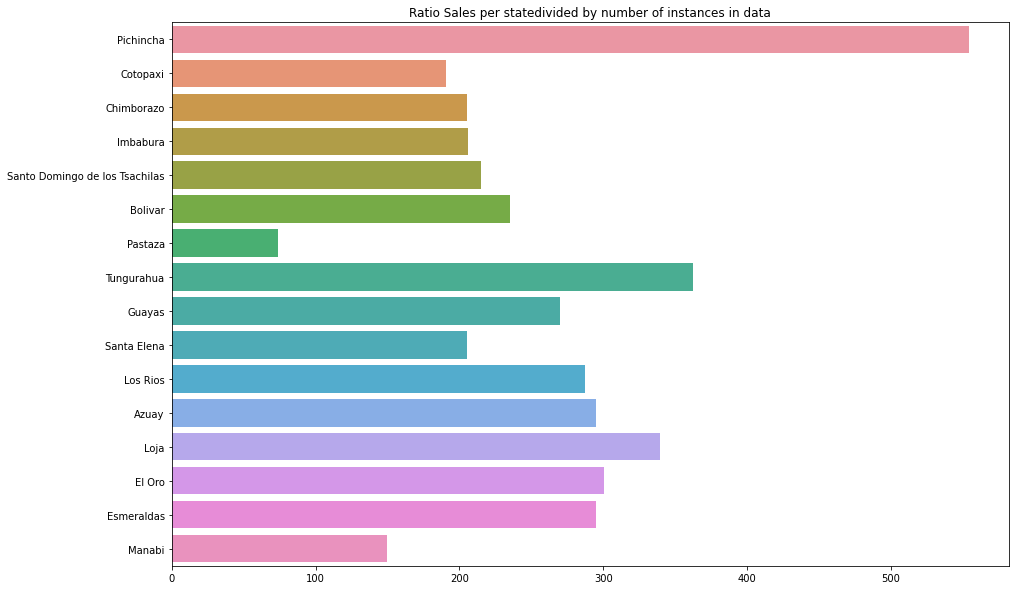

In [68]:
correlationcheck('state')

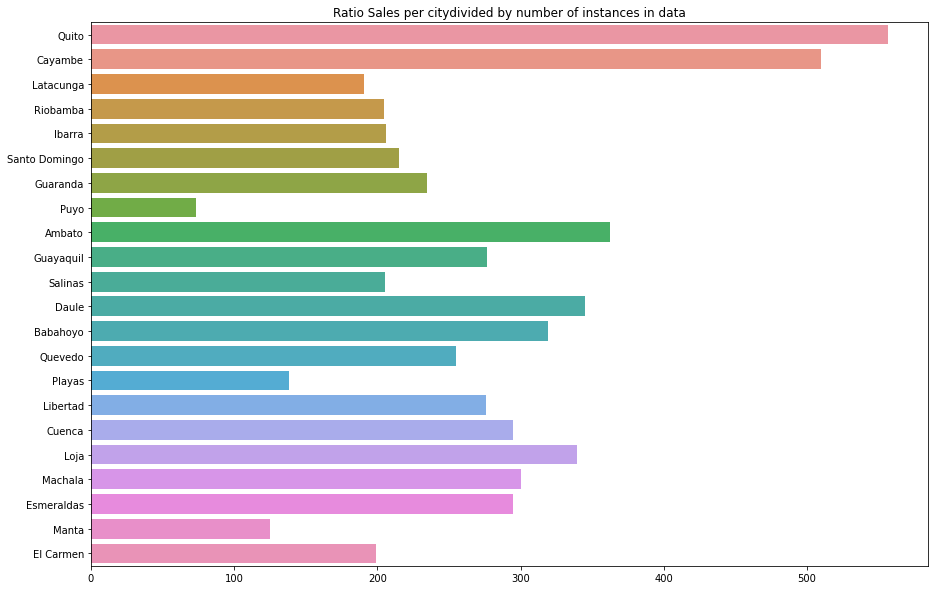

In [69]:
correlationcheck('city')

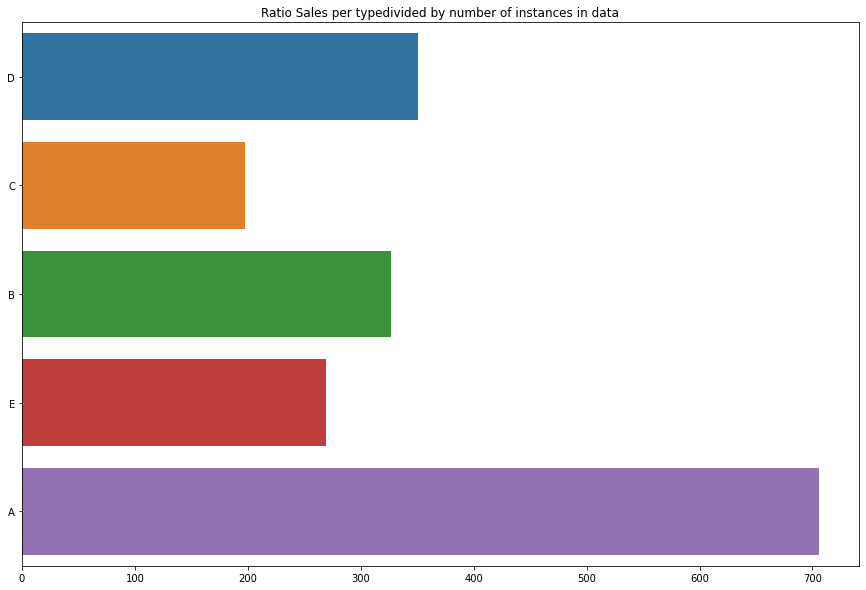

In [70]:
correlationcheck('type')

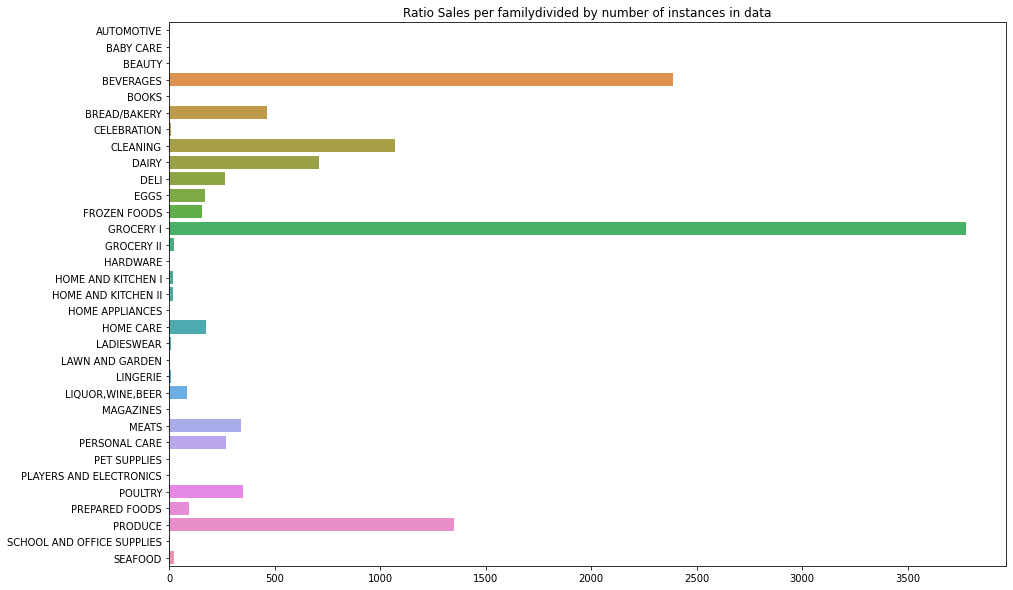

In [71]:
correlationcheck('family')

In [72]:
test = pd.get_dummies(test)

In [73]:
train = pd.get_dummies(train)

In [74]:
test.head()

,onpromotion,oil price,special_day,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,...,cluster_16,cluster_17,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
0,0,46.8,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,46.8,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,46.8,0.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20,46.8,0.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,46.8,0.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
train.head()

,sales,onpromotion,oil price,special_day,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,...,cluster_16,cluster_17,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
0,0.0,0,93.14,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0,93.14,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0,93.14,1.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0,93.14,1.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0,93.14,1.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
X = train.drop('sales', axis=1)

In [77]:
y = train['sales']

In [78]:
index = test.index

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
scaler = StandardScaler()

In [83]:
scaler.fit(X_train)

StandardScaler()

In [84]:
X_train = scaler.fit_transform(X_train)

In [85]:
test = scaler.fit_transform(test)

In [86]:
# BUILDING MODEL

In [87]:
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor

In [88]:
lr =  LinearRegression()

rfr = RandomForestRegressor(n_estimators=20, max_features='sqrt')

In [89]:
import tensorflow as tf
import keras

In [90]:
X_train.shape

(2400710, 96)

In [91]:
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(96)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(60, activation='relu'),
    keras.layers.Dense(1, activation='linear'),
])

In [92]:
model.compile(optimizer='SGD', loss='mae', metrics='mse')

In [93]:
model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
75023/75023 [==============================] - 148s 2ms/step - loss: 126.9374 - mse: 263217.5938
Epoch 2/5
75023/75023 [==============================] - 149s 2ms/step - loss: 120.8895 - mse: 247278.1094
Epoch 3/5
75023/75023 [==============================] - 154s 2ms/step - loss: 119.6641 - mse: 245960.2969
Epoch 4/5
75023/75023 [==============================] - 147s 2ms/step - loss: 118.8351 - mse: 244143.9844
Epoch 5/5
75023/75023 [==============================] - 148s 2ms/step - loss: 118.3513 - mse: 242322.6250


In [94]:
lr.fit(X_train, y_train)

rfr.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=20)

In [ ]:
y_pred_lr = abs(lr.predict(X_test))

y_pred_rfr = abs(rfr.predict(X_test))

y_pred_nn = abs(model.predict(X_test))

In [96]:
from sklearn.metrics import mean_squared_log_error

import math

In [ ]:
y_test.mean()

In [98]:
math.sqrt(mean_squared_log_error(y_test, y_pred_nn))

2.9255814893409133

In [106]:
math.sqrt(mean_squared_log_error(y_test, y_pred_lr))

32.08641261016837

In [100]:
math.sqrt(mean_squared_log_error(y_test, y_pred_rfr))

3.615412012030393

In [101]:
# NEURAL NETWORK PERFORMED THE BEST

In [107]:
predictions = model.predict(test)

891/891 [==============================] - 1s 1ms/step


In [112]:
abs_predictions = abs(predictions)

In [114]:
abs_predictions = np.reshape(abs_predictions, (-1,))

In [160]:
submission = pd.DataFrame({'id': index, 'sales': abs_predictions})

In [156]:
submission = submission.round(0)

In [161]:
submission.to_csv('submission.csv', index=False)

In [157]:
submission

,id,sales
0,3000888,2.0
1,3000889,0.0
2,3000890,4.0
3,3000891,3042.0
4,3000892,0.0
...,...,...
28507,3029395,280.0
28508,3029396,63.0
28509,3029397,0.0
28510,3029398,0.0


In [159]:
pd.read_csv('submission.csv')

,id,sales
0,3000888,2.0
1,3000889,0.0
2,3000890,4.0
3,3000891,3042.0
4,3000892,0.0
...,...,...
28507,3029395,280.0
28508,3029396,63.0
28509,3029397,0.0
28510,3029398,0.0


In [150]:
pd.read_csv('sample_submission.csv')

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0
...,...,...
28507,3029395,0.0
28508,3029396,0.0
28509,3029397,0.0
28510,3029398,0.0
